In [1]:
%matplotlib inline

In [2]:
#format the book
import book_format
book_format.set_style()

## Introduction

最后一章讨论了离散贝叶斯滤波器的一些缺点。对于许多跟踪和过滤问题，我们希望有一个*单峰*和*连续*的过滤器。也就是说，我们希望使用浮点数学（连续）对我们的系统进行建模，并且只表示一个信念（单峰）。例如，我们想说一架飞机在 (12.34, -95.54, 2389.5) 位置，即纬度、经度和高度。我们不希望我们的过滤器告诉我们“它可能在 (1.65, -78.01, 2100.45) 或者它可能在 (34.36, -98.23, 2543.79)。”这与我们对世界如何运作的物理直觉不符，正如我们所讨论的，计算多模式情况可能会非常昂贵。而且，当然，多个位置估计使导航变得不可能。

我们需要一种单峰、连续的方式来表示模拟现实世界如何运作的概率，并且计算效率高。高斯分布提供了所有这些特征。

## Mean, Variance, and Standard Deviations

你们中的大多数人都接触过统计数据，但无论如何，请允许我介绍这些材料。 我要求你阅读这些材料，即使你确定你很了解它。 我问有两个原因。 首先，我想确保我们以相同的方式使用术语。 其次，我努力形成对统计数据的直观理解，这将在后面的章节中为您提供很好的帮助。 学习统计课程很容易，只记住公式和计算，并且可能对所学内容的含义感到模糊。

### Random Variables

每次您掷骰子时，*结果* 将在 1 到 6 之间。如果我们掷骰子一百万次，我们希望得到 1/6 的时间。 因此，我们说结果 1 的 *概率* 或 *赔率 * 是 1/6。 同样，如果我问你下一次掷骰结果的概率是 1，你会回答 1/6。

这种值和相关概率的组合称为 [*随机变量*]（https://en.wikipedia.org/wiki/Random_variable）。 这里*随机*并不意味着过程是不确定的，只是我们缺乏关于结果的信息。 掷骰子的结果是确定性的，但我们缺乏足够的信息来计算结果。 我们不知道会发生什么，除了概率。

在我们定义术语时，值的范围称为 [*sample space*](https://en.wikipedia.org/wiki/Sample_space)。 对于骰子，样本空间是 {1, 2, 3, 4, 5, 6}。 对于硬币，样本空间是 {H, T}。 *空间*是一个数学术语，表示具有结构的集合。 骰子的样本空间是 1 到 6 范围内的自然数的子集。

另一个随机变量的例子是大学学生的身高。 这里的样本空间是生物学定义的两个极限之间的实数范围。

抛硬币和掷骰子等随机变量是*离散随机变量*。这意味着它们的样本空间由有限数量的值或可数无限数量的值（例如自然数）表示。人类的身高被称为*连续随机变量*，因为它们可以取两个极限之间的任何实数值。

不要将随机变量的*测量*与实际值混淆。如果我们只能测量一个人的身高到 0.1 米，我们只能记录 0.1、0.2、0.3...2.7 的值，从而产生 27 个离散选择。尽管如此，一个人的身高可以在这些范围之间的任意实际值之间变化，因此身高是一个连续的随机变量。

在统计学中，大写字母用于随机变量，通常来自字母表的后半部分。所以，我们可以说$X$是代表掷骰子的随机变量，或者$Y$是新生诗歌班学生的身高。后面的章节使用线性代数来解决这些问题，因此我们将遵循使用小写表示向量，使用大写表示矩阵的惯例。不幸的是，这些约定相互冲突，您必须从上下文中确定作者使用的是哪个作者。我总是对向量和矩阵使用粗体符号，这有助于区分两者。

## Probability Distribution

[*概率分布*](https://en.wikipedia.org/wiki/Probability_distribution) 给出了随机变量在样本空间中取任何值的概率。 例如，对于一个公平的六面骰子，我们可以说：

|Value|Probability|
|-----|-----------|
|1|1/6|
|2|1/6|
|3|1/6|
|4|1/6|
|5|1/6|
|6|1/6|

我们用小写的 p 表示这个分布：$p(x)$。 使用普通的函数符号，我们会写：

$$P(X{=}4) = p(4) = \frac{1}{6}$$

这表明骰子落在 4 上的概率是 $\frac{1}{6}$。 $P(X{=}x_k)$ 是“$X$ 是 $x_k$ 的概率”的符号。 注意细微的符号差异。 大写的$P$表示单个事件的概率，小写的$p$是概率分布函数。 如果你不注意，这可能会让你误入歧途。 一些文本使用 $Pr$ 而不是 $P$ 来改善这一点。

另一个例子是公平的硬币。 它有样本空间{H, T}。 硬币是公平的，所以正面 (H) 的概率是 50%，反面 (T) 的概率是 50%。 我们把它写成

$$\begin{gathered}P(X{=}H) = 0.5\\P(X{=}T)=0.5\end{gathered}$$

样本空间不是唯一的。一个骰子的样本空间是 {1, 2, 3, 4, 5, 6}。另一个有效的样本空间是{偶数，奇数}。另一个可能是{所有角落的点，而不是所有角落的点}。只要样本空间涵盖所有可能性，并且任何单个事件仅由一个元素描述，它就是有效的。 {even, 1, 3, 4, 5} 不是骰子的有效样本空间，因为值 4 与 'even' 和 '4' 都匹配。

*离散随机值*的所有值的概率称为*离散概率分布*，*连续随机值*的所有值的概率称为*连续概率分布*。

要成为概率分布，每个值 $x_i$ 的概率必须是 $x_i \ge 0$，因为没有概率可以小于零。其次，所有值的概率之和必须等于 1。这对于抛硬币来说应该是直观的：如果正面的几率是 70%，那么反面的几率必须是 30%。我们将此要求表述为

$$\sum\limits_u P(X{=}u)= 1$$


对于离散分布，并且作为

$$\int\limits_u P(X{=}u) \,du= 1$$

对于连续分布。

在上一章中，我们使用概率分布来估计狗在走廊中的位置。 例如：

sum =  1.0


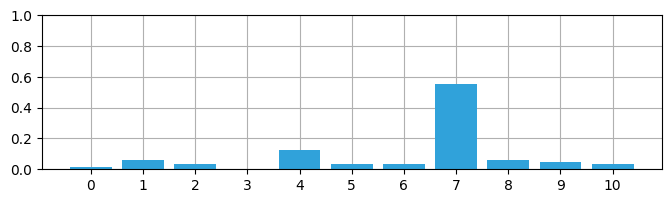

In [3]:
import numpy as np
import kf_book.book_plots as book_plots

belief = np.array([1, 4, 2, 0, 8, 2, 2, 35, 4, 3, 2])
belief = belief / np.sum(belief)
with book_plots.figsize(y=2):
    book_plots.bar_plot(belief)
print('sum = ', np.sum(belief))

每个位置都有一个介于 0 和 1 之间的概率，并且所有位置的总和等于 1，因此这使其成为概率分布。 每个概率都是离散的，因此我们可以更准确地将其称为离散概率分布。 在实践中，我们省略了离散和连续这两个术语，除非我们有特定的理由进行区分。

### The Mean, Median, and Mode of a Random Variable

给定一组数据，我们经常想知道该组的代表值或平均值。 对此有很多衡量标准，这个概念被称为 [*集中趋势衡量标准*]（https://en.wikipedia.org/wiki/Central_tendency）。 例如，我们可能想知道班级中学生的*平均*身高。 我们都知道如何找到一组数据的平均值，但让我详细说明一下，以便我可以介绍更正式的符号和术语。 平均值的另一个词是 *mean*。 我们通过将值相加并除以值的数量来计算平均值。 如果学生的身高以米为单位

$$X = \{1.8, 2.0, 1.7, 1.9, 1.6\}$$

我们将平均值计算为

$$\mu = \frac{1.8 + 2.0 + 1.7 + 1.9 + 1.6}{5} = 1.8$$

传统上使用符号 $\mu$ (mu) 来表示平均值。

我们可以用等式形式化这个计算

$$ \mu = \frac{1}{n}\sum^n_{i=1} x_i$$

NumPy 提供了`numpy.mean()` 来计算平均值。

In [4]:
x = [1.8, 2.0, 1.7, 1.9, 1.6]
np.mean(x)

1.8

为方便起见，NumPy 数组提供了 `mean()` 方法。

In [5]:
x = np.array([1.8, 2.0, 1.7, 1.9, 1.6])
x.mean()

1.8

一组数字的 *mode* 是最常出现的数字。如果只有一个数字最常出现，我们说它是*单峰*集合，如果两个或更多数字出现频率相同，则该集合是*多峰*。例如集合 {1, 2, 2, 2, 3, 4, 4, 4} 有模式 2 和 4，这是多模式的，集合 {5, 7, 7, 13} 有模式 7，等等它是单峰的。在本书中，我们不会以这种方式计算模态，但我们会在更一般的意义上使用单峰和多峰的概念。例如，在**离散贝叶斯**一章中，我们谈到了我们对狗的位置作为*多峰分布*的信念，因为我们为不同的位置分配了不同的概率。

最后，一组数字的 *median* 是该组的中点，因此一半的值低于中位数，一半高于中位数。这里，上面和下面是关于被排序的集合。如果该集合包含偶数个值，则将中间的两个数字平均在一起。

Numpy 提供 `numpy.median()` 来计算中位数。如您所见，{1.8, 2.0, 1.7, 1.9, 1.6} 的中位数为 1.8，因为 1.8 是该集合中排序后的第三个元素。在这种情况下，中位数等于平均值​​，但通常情况并非如此。

In [6]:
np.median(x)

1.8

## Expected Value of a Random Variable

随机变量的 [*expected value*](https://en.wikipedia.org/wiki/Expected_value) 是如果我们取无限数量的样本然后将这些样本平均在一起时的平均值。 假设我们有 $x=[1,3,5]$ 并且每个值都是同样可能的。 我们 * 期望 * $x$ 平均有什么价值？

当然，这将是 1、3 和 5 的平均值，即 3。这应该是有道理的； 我们预计会出现相同数量的 1、3 和 5，因此 $(1+3+5)/3=3$ 显然是该无限系列样本的平均值。 换句话说，这里的期望值是样本空间的 *mean*。

现在假设每个值都有不同的发生概率。 假设 1 有 80% 的机会发生，3 有 15% 的机会，而 5 只有 5% 的机会。 在这种情况下，我们通过将 $x$ 的每个值乘以它发生的百分比，并对结果求和来计算期望值。 对于这种情况，我们可以计算

$$\mathbb E[X] = (1)(0.8) + (3)(0.15) + (5)(0.05) = 1.5$$

这里我介绍了 $x$ 的期望值的符号 $\mathbb E[X]$。 有些文本使用$E(x)$。 $x$ 的值 1.5 具有直观意义，因为 $x$ 为 1 的可能性远大于 3 或 5，并且 3 也更有可能为 5。

我们可以通过让$x_i$ 是$X$ 的$i^{th}$ 值来形式化这个，$p_i$ 是它发生的概率。 这给了我们


$$\mathbb E[X] = \sum_{i=1}^n p_ix_i$$

一个微不足道的代数表明，如果概率都相等，则期望值与平均值相同：

$$\mathbb E[X] = \sum_{i=1}^n p_ix_i = \frac{1}{n}\sum_{i=1}^n x_i = \mu_x$$

如果 $x$ 是连续的，我们用总和代替积分，就像这样

$$\mathbb E[X] = \int_{a}^b\, xf(x) \,dx$$

其中 $f(x)$ 是 $x$ 的概率分布函数。 我们还不会使用这个等式，但我们将在下一章中使用它。

我们可以写一点 Python 来模拟这个。 在这里，我取 1,000,000 个样本并计算我们刚刚分析计算的分布的期望值。

In [9]:
total = 0
N = 1000000
for r in np.random.rand(N):
    if r <= .80: total += 1
    elif r < .95: total += 3
    else: total += 5

total / N

1.501008

您可以看到计算值接近解析得出的值。 这并不准确，因为获得准确的值需要无限的样本量。

### Exercise

掷骰子的期望值是多少？

### Solution

每一边的可能性相等，所以每一边的概率都是 1/6。 因此

$$\begin{aligned}
\mathbb E[X] &= 1/6\times1 + 1/6\times 2 + 1/6\times 3 + 1/6\times 4 + 1/6\times 5 + 1/6\times6 \\
&= 1/6(1+2+3+4+5+6)\\&= 3.5\end{aligned}$$

### Exercise

给定均匀连续分布

$$f(x) = \frac{1}{b - a}$$

计算 $a=0$ 和 $b=20$ 的期望值。

### Solution
$$\begin{aligned}
\mathbb E[X] &= \int_0^{20}\, x\frac{1}{20} \,dx \\
&= \bigg[\frac{x^2}{40}\bigg]_0^{20} \\
&= 10 - 0 \\
&= 10
\end{aligned}$$

### Variance of a Random Variable

上面的计算告诉我们学生的平均身高，但它并没有告诉我们我们可能想知道的一切。 例如，假设我们有三个班级的学生，我们将其标记为 $X$、$Y$ 和 $Z$，其高度如下：

In [10]:
X = [1.8, 2.0, 1.7, 1.9, 1.6]
Y = [2.2, 1.5, 2.3, 1.7, 1.3]
Z = [1.8, 1.8, 1.8, 1.8, 1.8]

使用 NumPy，我们看到每个类的平均高度是相同的。

In [11]:
print(np.mean(X), np.mean(Y), np.mean(Z))

1.8 1.8 1.8



每个等级的平均值为 1.8 米，但请注意，第二等级的高度变化量比第一等级大得多，而第三等级则完全没有变化。

平均值告诉我们一些关于数据的信息，但不是全部。 我们希望能够指定学生的身高之间有多少 *variation*。 你可以想象这有很多原因。 也许一个学区需要订购 5,000 张课桌，并且他们希望确保购买适合学生身高范围的尺寸。

统计学已经将这种测量变异的概念正式化为 [*标准偏差*](https://en.wikipedia.org/wiki/Standard_deviation) 和 [*variance*](https://en.wikipedia.org/ 维基/方差）。 计算方差的方程是

$$\mathit{VAR}(X) = \mathbb  E[(X - \mu)^2]$$

暂时忽略平方，您可以看到方差是样本空间 $X$ 与均值 $\mu:$ ($X-\mu)$ 相差多少的*预期值*。 稍后我将解释平方项的用途。 期望值的公式是 $\mathbb E[X] = \sum\limits_{i=1}^n p_ix_i$ 所以我们可以把它代入上面的等式得到

$$\mathit{VAR}(X) = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2$$
 
让我们计算三个类的方差，看看我们得到什么值并熟悉这个概念。

$X$ 的平均值是 1.8 ($\mu_x = 1.8$) 所以我们计算

$$ 
\begin{aligned}
\mathit{VAR}(X) &=\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5} \\
&= \frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5} \\
\mathit{VAR}(X)&= 0.02 \, m^2
\end{aligned}$$

NumPy 提供了函数 var() 来计算方差：

In [12]:
print(f"{np.var(X):.2f} meters squared")

0.02 meters squared


这可能有点难以解释。 高度以米为单位，但方差为米的平方。 因此，我们有一个更常用的度量标准，即*标准差*，它定义为方差的平方根：

$$\sigma = \sqrt{\mathit{VAR}(X)}=\sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

通常使用 $\sigma$ 作为*标准差*，使用 $\sigma^2$ 作为*方差*。 在本书的大部分内容中，我将使用 $\sigma^2$ 而不是 $\mathit{VAR}(X)$ 来表示方差； 它们象征着同样的东西。

对于第一类，我们计算标准差

$$ 
\begin{aligned}
\sigma_x &=\sqrt{\frac{(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2} {5}} \\
&= \sqrt{\frac{0 + 0.04 + 0.01 + 0.01 + 0.04}{5}} \\
\sigma_x&= 0.1414
\end{aligned}$$

我们可以使用计算标准差的 NumPy 方法“numpy.std()”来验证这个计算。 “std”是标准差的常用缩写。

In [13]:
print(f"std {np.std(X):.4f}")
print(f"var {np.std(X)**2:.4f}")

std 0.1414
var 0.0200


当然，$0.1414^2 = 0.02$，这与我们之前对方差的计算一致。

标准差意味着什么？ 它告诉我们它们之间的高度差异有多大。 “多少”不是一个数学术语。 一旦我们在下一节中介绍了高斯的概念，我们将能够更精确地定义它。 现在我要说的是，对于许多事情来说，所有值的 68% 位于平均值的一个标准差内。 换句话说，我们可以得出结论，对于随机班级，68% 的学生身高在 1.66 (1.8-0.1414) 米和 1.94 (1.8+0.1414) 米之间。

我们可以在图中查看：

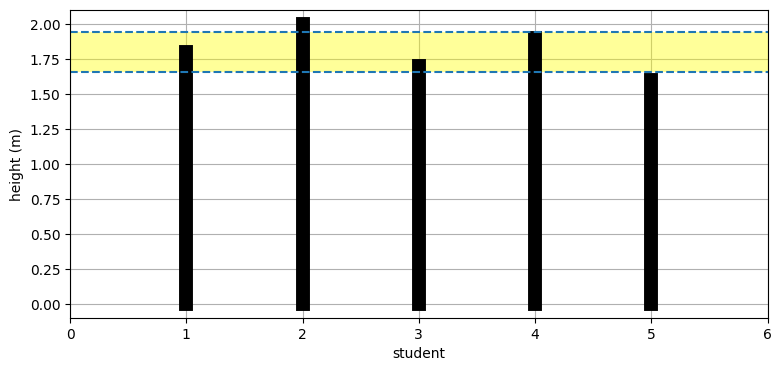

In [14]:
from kf_book.gaussian_internal import plot_height_std
import matplotlib.pyplot as plt

plot_height_std(X)

对于只有 5 名学生，我们显然不会在一个标准差内准确地得到 68%。 我们确实看到 5 个学生中有 3 个在 $\pm1\sigma$ 以内，即 60%，这与仅使用 5 个样本可以达到的 68% 非常接近。 让我们看看一个有 100 名学生的班级的结果。

> 我们把一个标准差写成$1\sigma$，读作“one standard deviation”，而不是“one sigma”。 两个标准差是 $2\sigma$，以此类推。

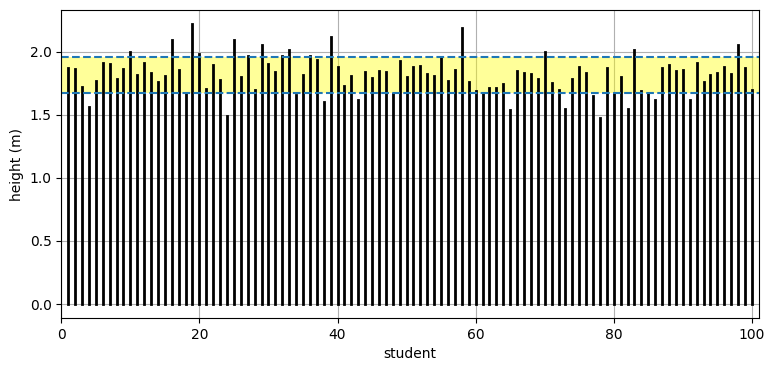

mean = 1.815
std  = 0.143


In [15]:
from numpy.random import randn
data = 1.8 + randn(100)*.1414
mean, std = data.mean(), data.std()

plot_height_std(data, lw=2)
print(f'mean = {mean:.3f}')
print(f'std  = {std:.3f}')

肉眼看来，大约 68% 的高度位于平均值 1.8 的 $\pm1\sigma$ 之内，但我们可以用代码验证这一点。

In [16]:
np.sum((data > mean-std) & (data < mean+std)) / len(data) * 100.

68.0

我们将很快更深入地讨论这个问题。 现在让我们计算标准差

$$Y = [2.2, 1.5, 2.3, 1.7, 1.3]$$

$Y$ 的均值是 $\mu=1.8$ m，所以

$$ 
\begin{aligned}
\sigma_y &=\sqrt{\frac{(2.2-1.8)^2 + (1.5-1.8)^2 + (2.3-1.8)^2 + (1.7-1.8)^2 + (1.3-1.8)^2} {5}} \\
&= \sqrt{0.152} = 0.39 \ m
\end{aligned}$$

我们将使用 NumPy 验证这一点

In [17]:
print(f'std of Y is {np.std(Y):.2f} m')

std of Y is 0.39 m


这符合我们的预期。 $Y$ 的高度变化更大，标准差也更大。

最后，让我们计算 $Z$ 的标准差。 值没有变化，因此我们预计标准偏差为零。

$$ 
\begin{aligned}
\sigma_z &=\sqrt{\frac{(1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2 + (1.8-1.8)^2} {5}} \\
&= \sqrt{\frac{0+0+0+0+0}{5}} \\
\sigma_z&= 0.0 \ m
\end{aligned}$$

In [18]:
print(np.std(Z))

0.0


在我们继续之前，我需要指出，我忽略了平均而言男性比女性高。通常，仅包含男性或女性的班级的身高差异将小于具有两性的班级。对于其他因素也是如此。营养良好的儿童比营养不良的儿童高。斯堪的纳维亚人比意大利人高。在设计实验时，统计学家需要考虑这些因素。

我建议我们可能会执行此分析以订购学区的课桌。对于每个年龄组，可能有两种不同的平均值 - 一个聚集在女性的平均身高周围，第二个平均值聚集在男性的平均身高周围。整个班级的平均值将介于两者之间。如果我们为所有学生的平均水平购买课桌，我们最终可能会得到一个既不适合学校男生也不适合女生的课桌！

我们不会在本书中考虑这些问题。如果您需要学习处理这些问题的技术，请查阅任何标准概率文本。

### Why the Square of the Differences


为什么我们要取方差的*平方*？ 我可以研究很多数学，但让我们以一种简单的方式来看待这个问题。 这是 $X$ 的值相对于 $X=[3,-3,3,-3]$ 的平均值绘制的图表

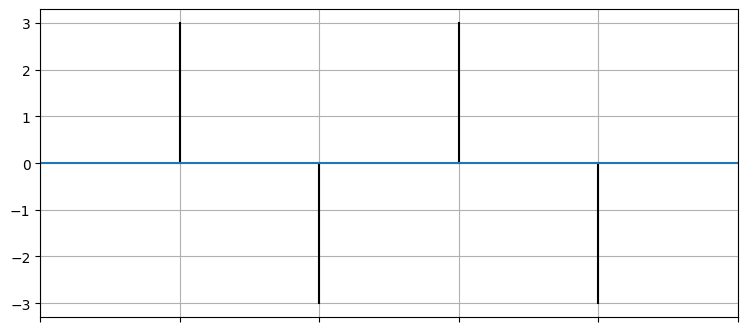

In [19]:
X = [3, -3, 3, -3]
mean = np.average(X)
for i in range(len(X)):
    plt.plot([i ,i], [mean, X[i]], color='k')
plt.axhline(mean)
plt.xlim(-1, len(X))
plt.tick_params(axis='x', labelbottom=False)

如果我们不取差异的平方，则符号将抵消一切：

$$\frac{(3-0) + (-3-0) + (3-0) + (-3-0)}{4} = 0$$

这显然是不正确的，因为数据中的方差大于 0。

也许我们可以使用绝对值？ 我们可以通过检查看到结果是 $12/4=3$，这当然是正确的——每个值与平均值相差 3。 但是如果我们有 $Y=[6, -2, -3, 1]$ 呢？ 在这种情况下，我们得到 $12/4=3$。 $Y$ 显然比 $X$ 更分散，但计算产生相同的方差。 如果我们使用平方公式，我们得到 $Y$ 的方差为 3.5，这反映了它更大的变化。

这不是正确性的证明。 事实上，这项技术的发明者卡尔·弗里德里希·高斯认识到它有些武断。 如果存在异常值，则对差异进行平方会对该项赋予不成比例的权重。 例如，让我们看看如果我们有会发生什么：

In [20]:
X = [1, -1, 1, -2, -1, 2, 1, 2, -1, 1, -1, 2, 1, -2, 100]
print(f'Variance of X with outlier    = {np.var(X):6.2f}')
print(f'Variance of X without outlier = {np.var(X[:-1]):6.2f}')

Variance of X with outlier    = 621.45
Variance of X without outlier =   2.03


这个对吗”？你告诉我。没有 100 的异常值，我们得到 $\sigma^2=2.03$，它准确地反映了 $X$ 在没有异常值的情况下是如何变化的。一个异常值淹没了方差计算。我们是否想要淹没计算以便我们知道存在异常值，或者稳健地合并异常值并且仍然提供接近没有异常值的值的估计？再说一次，你告诉我。显然，这取决于你的问题。

我不会继续走这条路；如果你有兴趣，你可能想看看 James Berger 在这个问题上所做的工作，在一个名为 *Bayesian robustness* 的领域，或 Peter J. Huber [4] 的 *robust statistics* 的优秀出版物。在本书中，我们将始终使用高斯定义的方差和标准差。

从中收集的要点是，这些*摘要*统计数据总是讲述关于我们数据的不完整故事。在这个例子中，高斯定义的方差并没有告诉我们我们有一个大的异常值。然而，它是一个强大的工具，因为我们可以用几个数字简洁地描述一个大数据集。如果我们有 10 亿个数据点，我们就不想用肉眼检查图或查看数字列表；摘要统计为我们提供了一种以有用的方式描述数据形状的方法。

## Gaussians

我们现在准备好了解 [Gaussians](https://en.wikipedia.org/wiki/Gaussian_function)。 让我们提醒自己本章的动机。

> 我们需要一种单峰、连续的方式来表示模拟现实世界如何运作的概率，并且计算效率高。

让我们看一下高斯分布图，以了解我们在说什么。

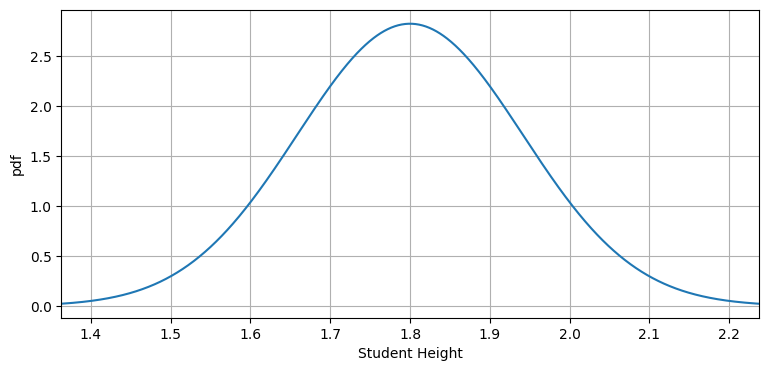

In [21]:
from filterpy.stats import plot_gaussian_pdf
plot_gaussian_pdf(mean=1.8, variance=0.1414**2, 
                  xlabel='Student Height', ylabel='pdf');

这条曲线是一个[*概率密度函数*]（https://en.wikipedia.org/wiki/Probability_density_function）或简称*pdf*。 它显示了随机变量取值的相对可能性。 我们可以从图表中看出，学生在 1.8 m 附近的身高比 1.7 m 高一些，1.9 m 对 1.4 m 的身高更有可能。 换句话说，很多学生的身高会接近1.8m，很少有学生的身高会达到1.4m或2.2米。 最后，请注意曲线以 1.8 m 的平均值为中心。

> 我在 Notebook *Computing_and_Plotting_PDFs* 的
Supporting_Notebooks 文件夹。 您可以在线阅读 [这里](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Supporting_Notebooks/Computing_and_plotting_PDFs.ipynb) [1]。

您可能会将其识别为“钟形曲线”。 这条曲线无处不在，因为在现实世界条件下，许多观察结果都以这种方式分布。 我不会使用术语“钟形曲线”来指代高斯，因为许多概率分布具有相似的钟形曲线形状。 非数学来源可能不那么精确，所以当你看到没有定义使用的术语时，要明智地得出结论。

这条曲线并不是高度所独有的——大量的自然现象都表现出这种分布，包括我们在过滤问题中使用的传感器。 正如我们将看到的，它还具有我们正在寻找的所有属性——它代表一个单峰信念或概率值，它是连续的，并且计算效率高。 我们很快就会发现它还具有其他我们可能没有意识到我们想要的品质。

为了进一步激励你，回忆一下*离散贝叶斯*一章中概率分布的形状：

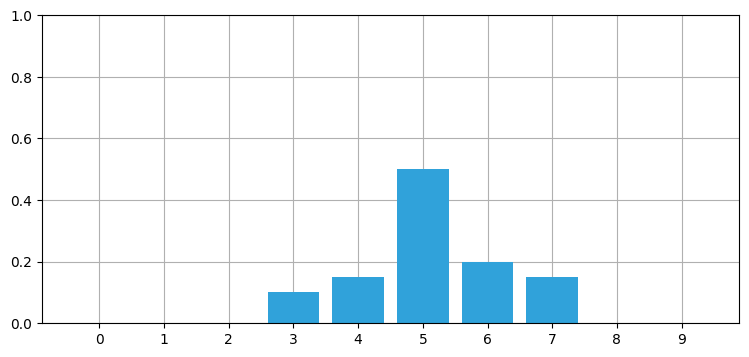

In [22]:
import kf_book.book_plots as book_plots
belief = [0., 0., 0., 0.1, 0.15, 0.5, 0.2, .15, 0, 0]
book_plots.bar_plot(belief)

它们不是完美的高斯曲线，但它们是相似的。 我们将使用高斯来代替那章中使用的离散概率！

## Nomenclature

在我们继续之前进行一些命名 - 此图表描述了*随机变量*的*概率密度*，其值介于 ($-\infty..\infty)$ 之间。 这意味着什么？ 想象一下，我们对一段高速公路上的汽车速度进行了无数次无限精确的测量。 然后，我们可以通过显示以任何给定速度经过的汽车的相对数量来绘制结果。 如果平均值为 120 公里/小时，它可能如下所示：

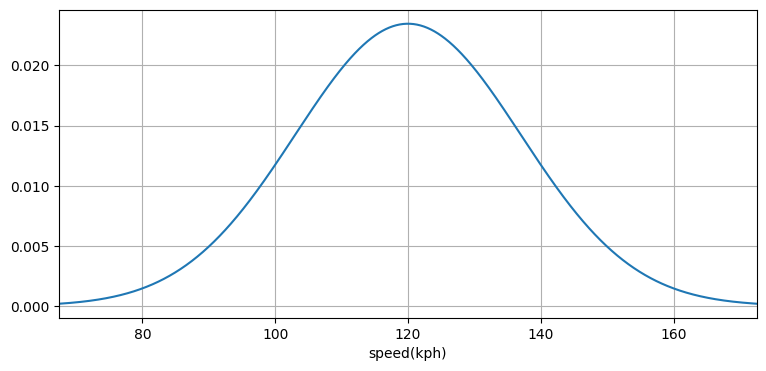

In [23]:
plot_gaussian_pdf(mean=120, variance=17**2, xlabel='speed(kph)');

y 轴描绘了*概率密度*——在相应 x 轴上加速行驶的汽车的相对数量。我将在下一节中进一步解释这一点。

高斯模型是不完善的。尽管这些图表没有显示它，但分布的 *tails* 延伸到无穷大。 *尾巴*是曲线的远端，值最低。当然，人的身高或汽车速度不能小于零，更不用说 $-\infty$ 或 $\infty$。 “地图不是领土”是一种常见的表达方式，贝叶斯过滤和统计也是如此。上面的高斯分布模拟了测量的汽车速度的分布，但作为一个模型，它必然是不完美的。模型和现实之间的差异将在这些过滤器中一次又一次地出现。高斯被用于许多数学分支，不是因为它们完美地模拟了现实，而是因为它们比任何其他相对准确的选择更容易使用。然而，即使在本书中，高斯也无法模拟现实，迫使我们使用计算成本高的替代方案。

您将听到这些分布称为*高斯分布*或*正态分布*。 *Gaussian* 和 *normal* 在此上下文中的含义相同，并且可以互换使用。我将在本书中同时使用这两个术语，因为不同的来源会使用这两个术语，我希望你习惯于同时看到这两个术语。最后，就像在本段中一样，通常会缩短名称并谈论 *Gaussian* 或 *normal*——这些都是 *Gaussian 分布*的典型快捷名称。

## Gaussian Distributions

让我们探索高斯是如何工作的。 高斯是一个*连续概率分布*，它完全用两个参数来描述，均值 ($\mu$) 和方差 ($\sigma^2$)。 它被定义为：

$$ 
f(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\big [{-\frac{(x-\mu)^2}{2\sigma^2} }\big ]
$$

$\exp[x]$ 是 $e^x$ 的符号。

<p> 如果你以前没有见过这个等式，不要被它吓倒； 你不需要记住或操纵它。 该函数的计算存储在 stats.py 中，函数为 gaussian(x, mean, var, normed=True)。
    
去掉常数，你可以看到它是一个简单的指数：
    
$$f(x)\propto e^{-x^2}$$

具有熟悉的钟形曲线形状

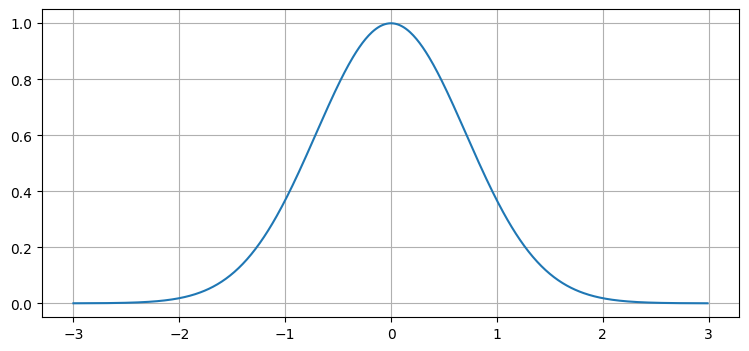

In [24]:
x = np.arange(-3, 3, .01)
plt.plot(x, np.exp(-x**2));

让我们提醒自己如何查看函数的代码。 在单元格中，键入函数名称，后跟两个问号，然后按 CTRL+ENTER。 这将打开一个显示源的弹出窗口。 取消注释下一个单元格并立即尝试。

In [25]:
from filterpy.stats import gaussian
#gaussian??

让我们绘制一个均值为 22 $(\mu=22)$，方差为 4 $(\sigma^2=4)$ 的高斯分布。

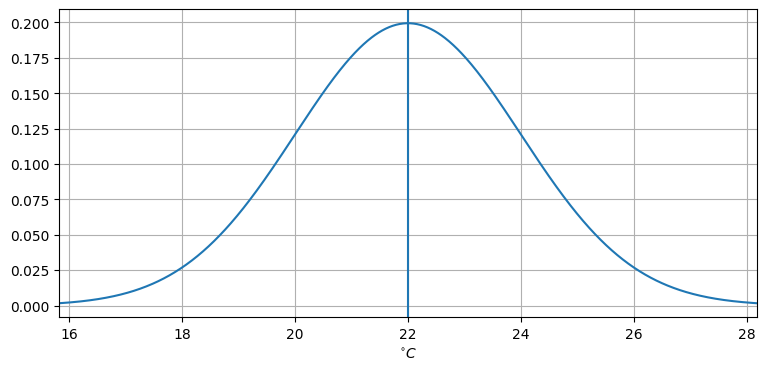

In [26]:
plot_gaussian_pdf(22, 4, mean_line=True, xlabel='$^{\circ}C$');

这条曲线*意味着什么*？假设我们有一个读数为 22°C 的温度计。没有温度计是完全准确的，因此我们预计每个读数都会略微偏离实际值。然而，一个名为 [*Central Limit Theorem*](https://en.wikipedia.org/wiki/Central_limit_theorem) 的定理指出，如果我们进行多次测量，则测量结果将呈正态分布。当我们查看此图表时，我们可以看到它与温度计在 22°C 的实际温度下读取特定值的概率成正比。

回想一下，高斯分布是*连续的*。想象一条无限长的直线——你随机选择的点为 2 的概率是多少。显然是 0%，因为有无数种选择可供选择。正态分布也是如此；在上图中，*恰好* 2°C 的概率为 0%，因为读数可以采用无限数量的值。

这条曲线是什么？这就是我们所说的*概率密度函数。*任何区域的曲线下面积都会为您提供这些值的概率。因此，例如，如果您计算 20 到 22 之间曲线下的面积，则所得面积将是温度读数介于这两个温度之间的概率。

这是另一种理解它的方法。岩石或海绵的*密度*是多少？它是衡量有多少质量被压缩到给定空间中的量度。岩石致密，海绵则不那么致密。所以，如果你想知道一块石头有多重但没有秤，你可以用它的体积乘以它的密度。这会给你它的质量。在

$$M = \iiint_R p(x,y,z)\, dV$$

我们对*概率密度*做同样的事情。如果您想知道温度在 20°C 和 21°C 之间，您可以将上面的曲线从 20 积分到 21。如您所知，曲线的积分可以为您提供曲线下的面积。由于这是概率密度的曲线，所以密度的积分就是概率。

温度正好是 22°C 的概率是多少？直观地说，0。这些是实数，22°C 与 22.00000000000017°C 的几率是无穷小的。从数学上讲，如果我们从 22 积分到 22，我们会得到什么？零。

回想一下岩石，岩石上一个点的重量是多少？一个无穷小的点必须没有重量。询问单个点的权重是没有意义的，询问具有单个值的连续分布的概率是没有意义的。两者的答案显然都是零。

在实践中，我们的传感器没有无限精度，因此 22°C 的读数意味着一个范围，例如 22 $\pm$ 0.1°C，我们可以通过从 21.9 积分到 22.1 来计算该范围的概率。

我们可以用贝叶斯术语或常客术语来考虑这一点。作为贝叶斯主义者，如果温度计读数正好是 22°C，那么我们的信念就用曲线来描述——我们认为实际（系统）温度接近 22°C 的信念非常高，而我们认为实际温度接近 18°C非常低。作为常客，我们会说，如果我们在 22°C 下对一个系统进行 10 亿次温度测量，那么测量值的直方图将看起来像这条曲线。

你如何计算概率或曲线下的面积？你整合高斯方程

$$ \int^{x_1}_{x_0}  \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}{(x-\mu)^2}/\sigma^2 } dx$$

这称为*累积概率分布*，通常缩写为*cdf*。

我写了`filterpy.stats.norm_cdf` 来为你计算积分。 例如，我们可以计算

In [27]:
from filterpy.stats import norm_cdf
print('Cumulative probability of range 21.5 to 22.5 is {:.2f}%'.format(
      norm_cdf((21.5, 22.5), 22,4)*100))
print('Cumulative probability of range 23.5 to 24.5 is {:.2f}%'.format(
      norm_cdf((23.5, 24.5), 22,4)*100))

Cumulative probability of range 21.5 to 22.5 is 19.74%
Cumulative probability of range 23.5 to 24.5 is 12.10%


平均值 ($\mu$) 就是听起来的样子——所有可能概率的平均值。由于曲线的对称形状，它也是曲线的最高部分。温度计读数为 22°C，这就是我们使用的平均值。

随机变量 $X$ 的正态分布的符号是 $X \sim\ \mathcal{N}(\mu,\sigma^2)$ 其中 $\sim$ 表示*根据*分布。这意味着我可以将温度计的温度读数表示为

$$\text{temp} \sim \mathcal{N}(22,4)$$

这是一个极其重要的结果。高斯允许我只用两个数字捕获无限数量的可能值！使用值 $\mu=22$ 和 $\sigma^2=4$ 我可以计算任何范围内的测量分布。

一些来源使用 $\mathcal N (\mu, \sigma)$ 而不是 $\mathcal N (\mu, \sigma^2)$。两者都可以，它们都是约定。如果您看到诸如 $\mathcal{N}(22,4)$ 之类的术语，您需要记住使用的是哪种形式。在本书中，我总是使用 $\mathcal N (\mu, \sigma^2)$，所以在这个例子中 $\sigma=2$, $\sigma^2=4$。

## The Variance and Belief

由于这是一个概率密度分布，因此要求曲线下的面积始终等于 1。 这应该很直观——曲线下的区域代表所有可能的结果，*某事*发生，而*某事发生*的概率为 1，因此密度总和必须为 1。 我们可以用一些代码自己证明这一点。 （如果你有数学倾向，将高斯方程从 $-\infty$ 积分到 $\infty$）

In [28]:
print(norm_cdf((-1e8, 1e8), mu=0, var=4))

1.0


这导致了一个重要的见解。 如果方差很小，则曲线将变窄。 这是因为方差是衡量样本与平均值相差多少*的量度。 要保持面积等于 1，曲线也必须很高。 另一方面，如果方差很大，则曲线会很宽，因此它也必须很短才能使面积等于 1。

让我们用图形来看看。 我们将使用前面提到的“filterpy.stats.gaussian”，它可以采用单个值或值数组。

In [29]:
from filterpy.stats import gaussian

print(gaussian(x=3.0, mean=2.0, var=1))
print(gaussian(x=[3.0, 2.0], mean=2.0, var=1))

0.24197072451914337
[0.378 0.622]


默认情况下，“高斯”对输出进行归一化，从而将输出转换回概率分布。 使用参数`normed`来控制它。

In [30]:
print(gaussian(x=[3.0, 2.0], mean=2.0, var=1, normed=False))

[0.242 0.399]


如果高斯未归一化，则称为*高斯函数*而不是*高斯分布*。

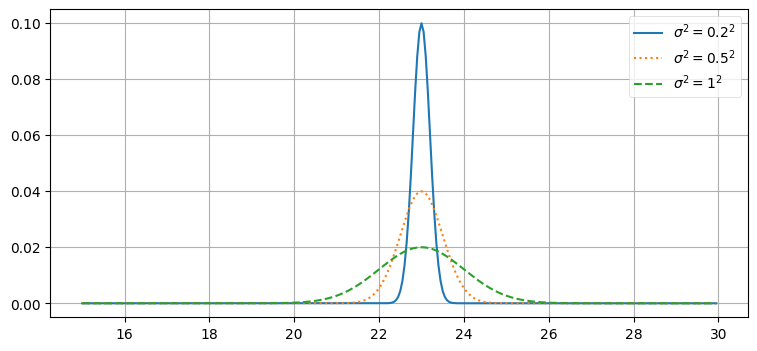

In [31]:
xs = np.arange(15, 30, 0.05)
plt.plot(xs, gaussian(xs, 23, 0.2**2), label='$\sigma^2=0.2^2$')
plt.plot(xs, gaussian(xs, 23, .5**2), label='$\sigma^2=0.5^2$', ls=':')
plt.plot(xs, gaussian(xs, 23, 1**2), label='$\sigma^2=1^2$', ls='--')
plt.legend();

这告诉我们什么？ $\sigma^2=0.2^2$ 的高斯分布非常窄。就是说我们相信 $x=23$，并且我们对此非常确定：在 $\pm 0.2$ 标准内。相比之下，$\sigma^2=1^2$ 的高斯也相信 $x=23$，但我们对此不太确定。我们认为 $x=23$ 较低，因此我们对 $x$ 的可能值的信念是分散的——例如，我们认为 $x=20$ 或 $x=26$ 的可能性很大。 $\sigma^2=0.2^2$ 几乎完全消除了 $22$ 或 $24$ 作为可能值，而 $\sigma^2=1^2$ 认为它们几乎与 $23$ 一样可能。

如果我们回想温度计，我们可以将这三条曲线视为代表三个不同温度计的读数。 $\sigma^2=0.2^2$ 的曲线表示非常准确的温度计，$\sigma^2=1^2$ 的曲线表示相当不准确的温度计。请注意高斯分布为我们提供的非常强大的属性——我们可以完全用两个数字来表示温度计的读数和误差——均值和方差。

高斯的等价形式是 $\mathcal{N}(\mu,1/\tau)$，其中 $\mu$ 是 *mean* 而 $\tau$ 是 *precision*。 $1/\tau = \sigma^2$;它是方差的倒数。虽然我们在本书中没有使用这个公式，但它强调了方差是衡量我们数据精确程度的指标。小的方差产生大的精度——我们的测量非常精确。相反，较大的方差会产生较低的精度——我们的信念分布在大范围内。你应该习惯于以这些等价形式思考高斯。在贝叶斯术语中，高斯反映了我们对测量的*信念*，它们表达了测量的*精度*，它们表达了测量中有多少*方差*。这些都是陈述同一事实的不同方式。

我有点超前了，但是在接下来的章节中，我们将使用高斯函数来表达我们对诸如我们正在跟踪的物体的估计位置或我们正在使用的传感器的准确性等事物的信念。

## The  68-95-99.7 Rule

现在值得在标准差上花几句话。标准差是衡量数据偏离平均值的程度。对于高斯分布，68% 的数据在均值的一个标准差 ($\pm1\sigma$) 内，95% 在两个标准差 ($\pm2\sigma$) 内，99.7% 在三个 ($ \pm3\sigma$)。这通常被称为 [68-95-99.7 规则](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)。如果你被告知一个班级的平均考试成绩为 71，标准差为 9.4，你可以得出结论，如果分布是正态的，95% 的学生得到的分数在 52.2 到 89.8 之间（即用 $71 (2 * 9.4)$)。

最后，这些不是任意数字。如果我们位置的高斯是 $\mu=22$ 米，那么标准差也有单位米。因此 $\sigma=0.2$ 意味着 68% 的测量范围在 21.8 到 22.2 米之间。方差是标准差的平方，因此 $\sigma^2 = .04$ 米$^2$。正如您在上一节中看到的那样，编写 $\sigma^2 = 0.2^2$ 可以使这更有意义，因为 0.2 与数据的单位相同。

下图描述了标准偏差和正态分布之间的关系。

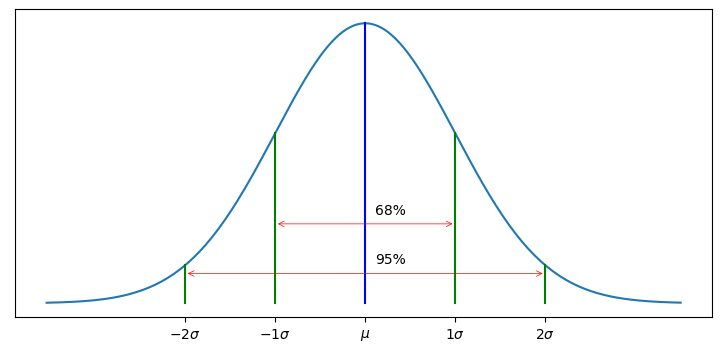

In [32]:
from kf_book.gaussian_internal import display_stddev_plot
display_stddev_plot()

## Interactive Gaussians

对于那些在 Jupyter Notebook 中阅读此内容的人，这里是高斯图的交互式版本。 使用滑块修改 $\mu$ 和 $\sigma^2$。 调整 $\mu$ 会使图形左右移动，因为您是在调整均值，而调整 $\sigma^2$ 会使钟形曲线变粗变细。

In [34]:
import math
from ipywidgets import interact, FloatSlider

def plt_g(mu,variance):
    plt.figure()
    xs = np.arange(2, 8, 0.01)
    ys = gaussian(xs, mu, variance)
    plt.plot(xs, ys)
    plt.ylim(0, 0.04)

interact(plt_g, mu=FloatSlider(value=5, min=3, max=7),
         variance=FloatSlider(value = .03, min=.01, max=1.));

interactive(children=(FloatSlider(value=5.0, description='mu', max=7.0, min=3.0), FloatSlider(value=0.03, desc…

最后，如果你在网上阅读这篇文章，这里有一个高斯动画。 首先，平均值向右移动。 然后均值以 $\mu=5$ 为中心并修改方差。
<img src='animations/04_gaussian_animate.gif'>

## Computational Properties of Gaussians


离散贝叶斯滤波器通过将任意概率分布相乘和相加来工作。 卡尔曼滤波器使用高斯而不是任意分布，但算法的其余部分保持不变。 这意味着我们将需要乘以和添加高斯。

高斯的一个显着特性是两个独立的独立正态变量的总和（https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables）也是正态分布的！ 该产品不是高斯的，而是与高斯成正比的。 在那里，我们可以说将两个高斯分布相乘的结果是一个高斯函数（在这种情况下，召回函数意味着不能保证值总和为 1 的性质）。

在我们做数学之前，让我们直观地测试一下。

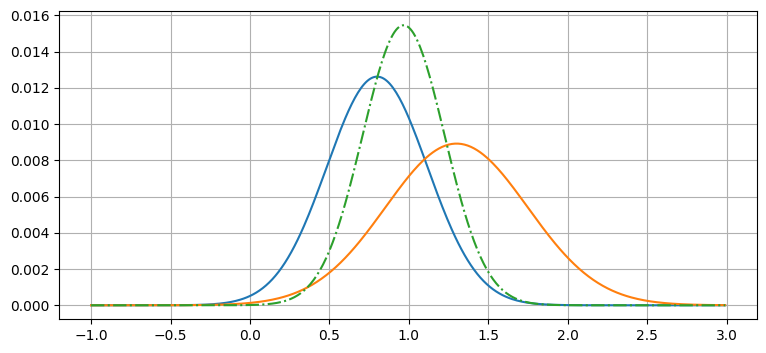

In [35]:
x = np.arange(-1, 3, 0.01)
g1 = gaussian(x, mean=0.8, var=.1)
g2 = gaussian(x, mean=1.3, var=.2)
plt.plot(x, g1, x, g2)

g = g1 * g2  # element-wise multiplication
g = g / sum(g)  # normalize
plt.plot(x, g, ls='-.');

在这里，我创建了两个高斯函数 g1=$\mathcal N(0.8, 0.1)$ 和 g2=$\mathcal N(1.3, 0.2)$ 并绘制了它们。 然后我将它们相乘并将结果归一化。 如您所见，结果*看起来*像高斯分布。

高斯函数是非线性函数。 通常，如果您将非线性方程相乘，您最终会得到不同类型的函数。 例如，将两个 sin 相乘的形状与`sin(x)` 非常不同。

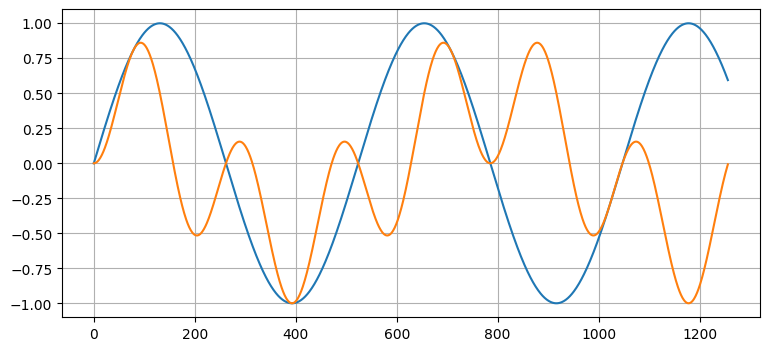

In [36]:
x = np.arange(0, 4*np.pi, 0.01)
plt.plot(np.sin(1.2*x))
plt.plot(np.sin(1.2*x) * np.sin(2*x));

但是两个高斯分布相乘的结果是一个高斯函数。 这是卡尔曼滤波器在计算上可行的关键原因。 换句话说，卡尔曼滤波器使用高斯*因为*它们在计算上很好。

两个独立高斯的乘积由下式给出：

$$\begin{aligned}\mu &=\frac{\sigma_1^2\mu_2 + \sigma_2^2\mu_1}{\sigma_1^2+\sigma_2^2}\\
\sigma^2 &=\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} 
\end{aligned}$$

两个高斯的和由下式给出

$$\begin{gathered}\mu = \mu_1 + \mu_2 \\
\sigma^2 = \sigma^2_1 + \sigma^2_2
\end{gathered}$$

在本章的最后，我推导出这些方程。 然而，理解推导并不是很重要。

## Putting it all Together

现在我们准备讨论如何在过滤中使用高斯。 在下一章中，我们将使用 Gaussins 实现一个滤波器。 在这里，我将解释为什么我们要使用高斯。

在上一章中，我们用数组表示概率分布。 我们通过计算该分布与另一个分布的元素乘积来执行更新计算，该分布表示每个点测量的可能性，如下所示：

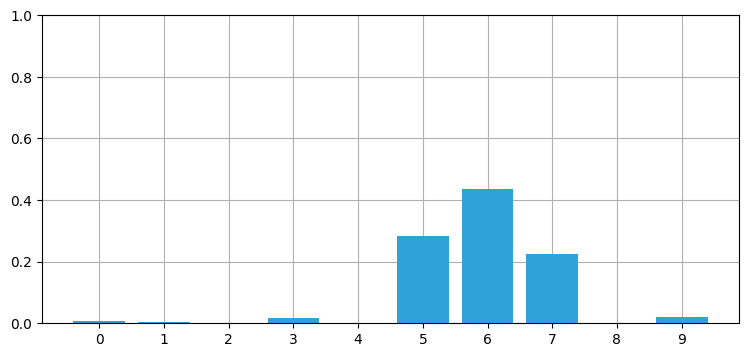

In [37]:
def normalize(p):
    return p / sum(p)

def update(likelihood, prior):
    return normalize(likelihood * prior)

prior =      normalize(np.array([4, 2, 0, 7, 2, 12, 35, 20, 3, 2]))
likelihood = normalize(np.array([3, 4, 1, 4, 2, 38, 20, 18, 1, 16]))
posterior = update(likelihood, prior)
book_plots.bar_plot(posterior)

换句话说，我们必须计算 10 次乘法才能得到这个结果。 对于具有多维大型数组的真实过滤器，我们需要数十亿次乘法和大量内存。

但是这个分布看起来像一个高斯分布。 如果我们使用高斯而不是数组怎么办？ 我将计算后验的均值和方差，并将其绘制在条形图上。

mean: 5.88 var: 1.24


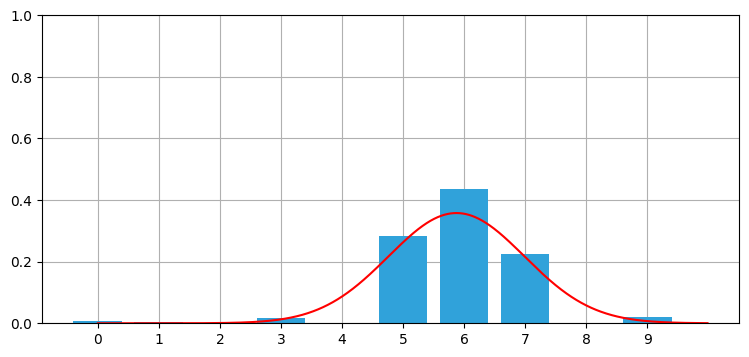

In [38]:
xs = np.arange(0, 10, .01)

def mean_var(p):
    x = np.arange(len(p))
    mean = np.sum(p * x,dtype=float)
    var = np.sum((x - mean)**2 * p)
    return mean, var

mean, var = mean_var(posterior)
book_plots.bar_plot(posterior)
plt.plot(xs, gaussian(xs, mean, var, normed=False), c='r');
print('mean: %.2f' % mean, 'var: %.2f' % var)

这令人印象深刻。 我们可以只用两个数字来描述数字的整个分布。 也许这个例子没有说服力，因为分布中只有 10 个数字。 但是一个真正的问题可能有数百万个数字，但仍然只需要两个数字来描述它。

接下来，回想一下我们的过滤器实现了更新功能

```python
def update(likelihood, prior):
    return normalize(likelihood * prior)
```

如果数组包含一百万个元素，那就是一百万次乘法。 但是，如果我们用高斯替换数组，那么我们将执行该计算

$$\begin{aligned}\mu &=\frac{\sigma_1^2\mu_2 + \sigma_2^2\mu_1}{\sigma_1^2+\sigma_2^2}\\
\sigma^2 &=\frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} 
\end{aligned}$$

这是三个乘法和两个除法。

### Bayes Theorem

在上一章中，我们通过推理我们在每个时刻拥有的信息开发了一种算法，我们将其表示为离散概率分布。 在这个过程中，我们发现了 [*Bayes' Theorem*](https://en.wikipedia.org/wiki/Bayes%27_theorem)。 贝叶斯定理告诉我们如何在给定先验信息的情况下计算事件的概率。

我们用这个概率计算实现了 `update()` 函数：

$$ \mathtt{posterior} = \frac{\mathtt{likelihood}\times \mathtt{prior}}{\mathtt{normalization}}$$ 

事实证明，这就是贝叶斯定理。 稍后我将发展数学，但在许多方面会掩盖这个等式中表达的简单概念。 我们将其解读为：

$$ updated\,knowledge = \big\|likelihood\,of\,new\,knowledge\times prior\, knowledge \big\|$$

其中$\| \cdot\|$ 表示对术语进行规范化。

我们得出这个结论的原因很简单，就是一只狗在走廊上走。 然而，正如我们将看到的，同样的等式适用于一系列过滤问题。 我们将在随后的每一章中使用这个等式。


回顾一下，*先验*是在我们包含测量概率（*可能性*）之前发生某事的概率，*后验*是我们在结合测量信息后计算的概率。

贝叶斯定理是

$$P(A \mid B) = \frac{P(B \mid A)\, P(A)}{P(B)}$$

$P(A \mid B)$ 被称为 [*条件概率*](https://en.wikipedia.org/wiki/Conditional_probability)。 也就是说，它表示 $A$ 发生的概率 *if* $B$ 发生。 例如，如果昨天也下雨，那么今天比典型的一天更有可能下雨，因为降雨系统通常持续一天以上。 鉴于昨天下雨，我们将今天下雨的概率写为 $P$(今天下雨 $\mid$ 昨天下雨)。


我掩盖了一个重要的观点。 在我们上面的代码中，我们使用的不是单个概率，而是一个概率数组——一个*概率分布*。 我刚刚给出的贝叶斯方程使用的是概率，而不是概率分布。 然而，它同样适用于概率分布。 我们对概率分布使用小写 $p$


$$p(A \mid B) = \frac{p(B \mid A)\, p(A)}{p(B)}$$

在上面的等式中，$B$ 是*证据*，$p(A)$ 是*先验*，$p(B \mid A)$ 是*似然*，$p(A \mid B)$ 是*后*。 通过用相应的单词替换数学术语，您可以看到贝叶斯定理与我们的更新方程匹配。 让我们根据我们的问题重写方程。 我们将使用 $x_i$ 表示 *i* 处的位置，并使用 $z$ 进行测量。 因此，我们想知道 $P(x_i \mid z)$，即在给定测量 $z$ 的情况下，狗在 $x_i$ 处的概率。

因此，让我们将其代入方程并求解。

$$p(x_i \mid z) = \frac{p(z \mid x_i) p(x_i)}{p(z)}$$

这看起来很难看，但实际上很简单。 让我们弄清楚右边每个术语的含义。 首先是$p(z \mid x_i)$。 这是在每个单元 $x_i$ 处测量的可能性或概率。 $p(x_i)$ 是 *prior* - 我们在合并测量之前的信念。 我们将它们相乘。 这只是 `update()` 函数中的非标准化乘法：

```python
def update(likelihood, prior):
    posterior = prior * likelihood   # p(z|x) * p(x)
    return normalize(posterior)
```

最后要考虑的项是分母 $p(z)$。 这是在不考虑位置的情况下获得测量值 $z$ 的概率。 它通常被称为*证据*。 我们通过在代码中获取 $x$ 的总和或“sum(belief)”来计算它。 这就是我们计算归一化的方式！ 因此，`update()` 函数只不过是计算贝叶斯定理。

文献经常以积分的形式给你这些方程。 毕竟，积分只是对连续函数的求和。 所以，你可能会看到贝叶斯定理写成

$$p(A \mid B) = \frac{p(B \mid A)\, p(A)}{\int p(B \mid A_j) p(A_j) \,\, \mathtt{d}A_j}\cdot$$

这个分母通常无法解析解；当它可以解决时，数学是非常困难的。最近的[意见片]（http://www.statslife.org.uk/opinion/2405-we-need-to-rethink-how-we-teach-statistics-from-the-ground-up）统计学会称其为“狗的早餐”[8]。采用贝叶斯方法的过滤教科书充满了没有解析解的积分方程。不要被这些方程吓倒，因为我们通过归一化我们的后验来简单地处理这个积分。我们将在**粒子过滤器**一章中学习更多处理此问题的技术。在那之前，要认识到在实践中它只是一个我们可以总结的标准化术语。我想说的是，当您面对一页积分时，只需将它们视为总和，并将它们与本章联系起来，通常困难就会消失。问问自己“为什么我们要对这些值求和”，以及“我为什么要除以这个术语”。令人惊讶的是，答案往往显而易见。令人惊讶的是，作者常常忽略了这种解释。

贝叶斯定理的强度可能对你来说还不是很明显。我们要计算 $p(x_i \mid Z)$。也就是说，在第 i 步，给定测量结果我们的可能状态是什么。总的来说，这是一个非常困难的问题。贝叶斯定理是通用的。我们可能想知道根据癌症检测结果我们患癌症的概率，或者在给定各种传感器读数的情况下下雨的概率。表示问题似乎无法解决。

但是贝叶斯定理让我们可以使用逆 $p(Z\mid x_i)$ 来计算它，这通常很容易计算

$$p(x_i \mid Z) \propto p(Z\mid x_i)\, p(x_i)$$

也就是说，要计算在给定特定传感器读数的情况下下雨的可能性，我们只需要计算给定正在下雨的传感器读数的可能性！ 这是一个***多***容易的问题！ 好吧，天气预报仍然是一个难题，但贝叶斯使它变得容易处理。

同样，正如您在离散贝叶斯一章中看到的那样，我们通过计算传感器读数在西蒙位于位置“x”的可能性来计算西蒙在走廊的任何给定部分的可能性。 一个难题变得容易。

### Total Probability Theorem

我们现在知道了 `update()` 函数背后的形式数学； `predict()` 函数呢？ `predict()` 实现了[*总概率定理*]（https://en.wikipedia.org/wiki/Law_of_total_probability）。让我们回顾一下 `predict()` 的计算结果。给定所有可能的运动事件的概率，它计算在任何给定位置的概率。让我们将其表示为等式。在时间 $t$ 处于任何位置 $i$ 的概率可以写成 $P(X_i^t)$。我们将其计算为在时间 $t-1$ $P(X_j^{t-1})$ 乘以从单元格 $x_j$ 移动到 $x_i$ 的概率的先验总和。那是

$$P(X_i^t) = \sum_j P(X_j^{t-1}) P(x_i | x_j)$$

该等式称为*总概率定理*。引用维基百科 [6] “它表达了可以通过几个不同事件实现的结果的总概率”。我本可以给你这个方程并实现“predict()”，但是你理解这个方程为什么起作用的机会很小。提醒一下，这里是计算这个方程的代码


```python
for i in range(N):
    for k in range (kN):
        index = (i + (width-k) - offset) % N
        result[i] += prob_dist[index] * kernel[k]
```


## Computing Probabilities with scipy.stats

在本章中，我使用了来自 [FilterPy](https://github.com/rlabbe/filterpy) 的代码来计算和绘制高斯分布图。 我这样做是为了让您有机会查看代码并了解这些功能是如何实现的。 然而，Python 自带“含电池”的说法，它在模块`scipy.stats` 中提供了广泛的统计功能。 那么让我们来看看如何使用 scipy.stats 来计算统计数据和概率。

`scipy.stats` 模块包含许多对象，您可以使用它们来计算各种概率分布的属性。 该模块的完整文档在这里：http://docs.scipy.org/doc/scipy/reference/stats.html。 我们将关注实现正态分布的范数变量。 让我们看一些使用`scipy.stats.norm`计算高斯的代码，并将其值与FilterPy的`gaussian()`函数返回的值进行比较。


In [39]:
from scipy.stats import norm
import filterpy.stats
print(norm(2, 3).pdf(1.5))
print(filterpy.stats.gaussian(x=1.5, mean=2, var=3*3))

0.13114657203397997
0.13114657203397995


调用“norm(2, 3)”创建了 scipy 所谓的“冻结”分布——它创建并返回一个平均值为 2、标准差为 3 的对象。然后您可以多次使用该对象来获得概率 各种值的密度，如下所示：

In [40]:
n23 = norm(2, 3)
print('pdf of 1.5 is       %.4f' % n23.pdf(1.5))
print('pdf of 2.5 is also  %.4f' % n23.pdf(2.5))
print('pdf of 2 is         %.4f' % n23.pdf(2))

pdf of 1.5 is       0.1311
pdf of 2.5 is also  0.1311
pdf of 2 is         0.1330


[scipy.stats.norm](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.normfor) [2] 的文档列出了许多其他功能 . 例如，我们可以使用 rvs() 函数从分布中生成 $n$ 个样本。

In [41]:
np.set_printoptions(precision=3, linewidth=50)
print(n23.rvs(size=15))

[ 1.157  6.051  1.297  7.826  3.578  1.09   3.641
 -1.996  5.597  2.528  2.849  6.31  -0.687  2.404
 -1.739]


我们可以得到[*累积分布函数（CDF）*]（https://en.wikipedia.org/wiki/Cumulative_distribution_function），它是从分布中随机抽取的值小于或等于$x的概率 美元。

In [43]:
# probability that a random value is less than the mean 2
print(n23.cdf(2))

0.5


我们可以得到分布的各种性质：

In [44]:
print('variance is', n23.var())
print('standard deviation is', n23.std())
print('mean is', n23.mean())

variance is 9.0
standard deviation is 3.0
mean is 2.0


## Limitations of Using Gaussians to Model the World

前面我提到了*中心极限定理*，它指出在某些条件下，任何独立随机变量的算术和都将呈正态分布，而不管随机变量如何分布。这对我们很重要，因为自然界充满了非正态分布，但是当我们将中心极限定理应用于大量人口时，我们最终会得到正态分布。

然而，证明的一个关键部分是“在某些条件下”。这些条件通常不适用于物理世界。例如，厨房秤的读数不能低于零，但如果我们将测量误差表示为高斯曲线，则曲线左侧延伸到负无穷大，这意味着给出负读数的可能性非常小。

这是一个广泛的话题，我不会详尽地讨论。

让我们考虑一个简单的例子。我们认为考试成绩之类的东西是正态分布的。如果你曾经有过一位教授“在曲线上评分”，那么你就会受到这个假设的影响。但当然，考试成绩不能服从正态分布。这是因为该分布为 *any* 值分配了一个非零概率分布，无论离均值多远。因此，例如，假设您的平均值为 90，标准差为 13。正态分布假设某人得到 90 的可能性很大，而某人得到 40 的可能性很小。但是，这也意味着存在是某人获得 -10 或 150 分的可能性很小。它分配了极小的机会获得 $-10^{300}$ 或 $10^{32986}$ 的分数。高斯分布的尾部是无限长的。

但是对于测试，我们知道这是不正确的。忽略额外的学分，你不能得到小于 0 或大于 100 的分数。让我们使用正态分布绘制这个值范围，看看这代表真实考试分数分布有多差。

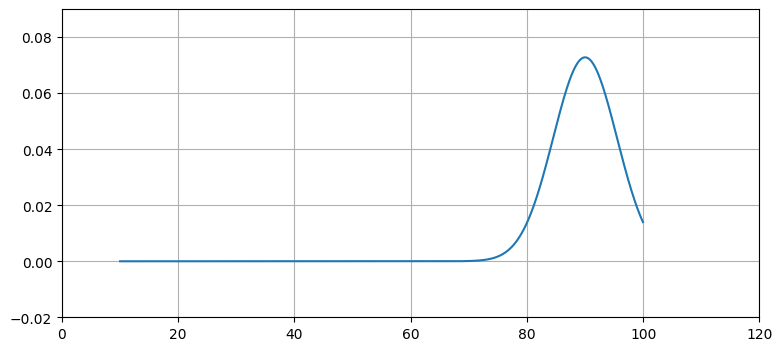

In [45]:
xs = np.arange(10, 100, 0.05)
ys = [gaussian(x, 90, 30) for x in xs]
plt.plot(xs, ys, label='var=0.2')
plt.xlim(0, 120)
plt.ylim(-0.02, 0.09);

曲线下的面积不能等于 1，因此它不是概率分布。实际发生的情况是，比正态分布预测的更多学生获得的分数接近范围的上限（例如），并且尾巴变得“胖”。此外，该测试可能无法完美区分学生技能的微小差异，因此平均值左侧的分布也可能在某些地方有点聚集。

传感器测量世界。传感器测量中的误差很少是真正的高斯误差。现在谈论这给卡尔曼滤波器设计者带来的困难还为时过早。值得牢记的是，卡尔曼滤波器数学是基于理想化的世界模型。现在我将介绍一些代码，我将在本书后面使用这些代码来形成分布以模拟各种过程和传感器。这种分布称为 [*Student's $t$-distribution*](https://en.wikipedia.org/wiki/Student%27s_t-distribution)。

假设我想对输出中有一些白噪声的传感器进行建模。为简单起见，假设信号为常数 10，噪声的标准差为 2。我们可以使用函数 `numpy.random.randn()` 获得均值为 0 和标准差的随机数1. 我可以用以下方法模拟这个：

In [46]:
from numpy.random import randn
def sense():
    return 10 + randn()*2

让我们绘制那个信号，看看它是什么样子的。

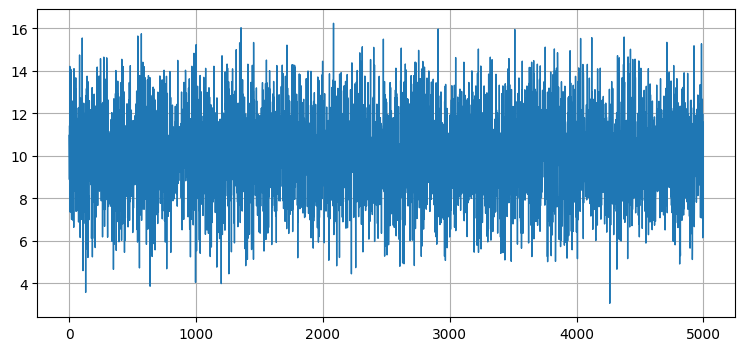

In [47]:
zs = [sense() for i in range(5000)]
plt.plot(zs, lw=1);

这看起来就像我所期望的那样。 信号以 10 为中心。标准偏差为 2 意味着 68% 的测量值在 10 的 $\pm$ 2 内，99% 的测量值在 10 的 $\pm$ 6 内，看起来像 正在发生。

现在让我们看看使用 Student 的 $t$-distribution 生成的分布。 我不会深入数学，只是给你它的源代码，然后使用它绘制一个分布。

In [48]:
import random
import math

def rand_student_t(df, mu=0, std=1):
    """return random number distributed by Student's t 
    distribution with `df` degrees of freedom with the 
    specified mean and standard deviation.
    """
    x = random.gauss(0, std)
    y = 2.0*random.gammavariate(0.5*df, 2.0)
    return x / (math.sqrt(y / df)) + mu

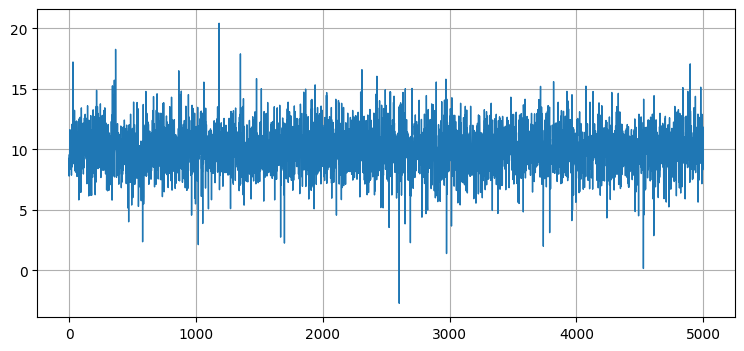

In [49]:
def sense_t():
    return 10 + rand_student_t(7)*2

zs = [sense_t() for i in range(5000)]
plt.plot(zs, lw=1);

从图中我们可以看出，虽然输出与正态分布相似，但仍有离群值远远超过平均值 3 个标准差（7 到 13）的异常值。

学生的 $t$ 分布不太可能是您的传感器（例如 GPS 或多普勒）如何执行的准确模型，而且这不是一本关于如何为物理系统建模的书。但是，当出现真实世界的噪声时，它确实会产生合理的数据来测试您的滤波器的性能。我们将在本书其余部分的模拟和测试中使用类似的分布。

这不是一个无所事事的问题。卡尔曼滤波器方程假设噪声是正态分布的，如果这不是真的，则执行次优。任务关键型滤波器（例如航天器上的滤波器）的设计人员需要掌握大量有关航天器上传感器性能的理论和经验知识。例如，我在 NASA 任务中看到的一个演示文稿指出，虽然理论上他们应该使用 3 个标准偏差来区分实际测量中的噪声，但他们必须使用 5 到 6 个标准偏差。这是他们通过实验确定的。

rand_student_t 的代码包含在 `filterpy.stats` 中。您可以将它与

```python
from filterpy.stats import rand_student_t
```

虽然我不会在这里介绍它，但统计学已经定义了描述概率分布形状的方法，即概率分布与指数分布的变化方式。 正态分布围绕均值对称形成 - 就像钟形曲线。 但是，概率分布可能围绕均值不对称。 对此的度量称为 [*skew*](https://en.wikipedia.org/wiki/Skewness)。 尾部可以缩短、变胖、变细或以其他方式与指数分布不同的形状。 对此的度量称为 [*kurtosis*](https://en.wikipedia.org/wiki/Kurtosis)。 `scipy.stats` 模块包含计算这些统计数据的函数 `describe` 等等。

In [50]:
import scipy
scipy.stats.describe(zs)

DescribeResult(nobs=5000, minmax=(-2.7183730349322204, 20.420281827125923), mean=10.005065867203239, variance=2.9264175153954546, skewness=-0.14690991791314403, kurtosis=2.3715564030145684)

让我们检查两个正常人群，一小群，一大群：

In [51]:
print(scipy.stats.describe(np.random.randn(10)))
print()
print(scipy.stats.describe(np.random.randn(300000)))

DescribeResult(nobs=10, minmax=(-1.721774752657727, 1.8352648934207132), mean=0.37459590356099853, variance=1.7961691408797076, skewness=-0.310042667966978, kurtosis=-1.4847496751826053)

DescribeResult(nobs=300000, minmax=(-4.383161614004681, 4.607929024821542), mean=-0.0015922181204686841, variance=1.0057784269578345, skewness=0.0042616599588623984, kurtosis=0.005941610848657408)


小样本具有非常非零的偏斜和峰度，因为少量样本没有很好地分布在均值 0 周围。您还可以通过将计算的均值和方差与理论均值 0 和方差 1 进行比较来看到这一点。 比较大样本的均值和方差非常接近理论值，偏度和峰度都接近于零。

## Product of Gaussians (Optional)


阅读本节并不重要。 在这里，我推导出两个高斯乘积的方程。

您可以通过将两个高斯方程相乘并组合项来找到此结果。 代数变得混乱。 我将使用贝叶斯定理推导出它。 我们可以将问题表述为：设先验为$N(\bar\mu, \bar\sigma^2)$，测量为$z \propto N(z, \sigma_z^2)$。 给定测量 z 的后验 x 是多少？

将后验写为 $p(x \mid z)$。 现在我们可以使用贝叶斯定理来说明

$$p(x \mid z) = \frac{p(z \mid x)p(x)}{p(z)}$$

$p(z)$ 是一个归一化常数，所以我们可以创建一个比例

$$p(x \mid z) \propto p(z|x)p(x)$$

现在我们将方程代入高斯方程，即

$$p(z \mid x) = \frac{1}{\sqrt{2\pi\sigma_z^2}}\exp \Big[-\frac{(z-x)^2}{2\sigma_z^2}\Big]$$

$$p(x) = \frac{1}{\sqrt{2\pi\bar\sigma^2}}\exp \Big[-\frac{(x-\bar\mu)^2}{2\bar\sigma^2}\Big]$$

我们可以去掉主要术语，因为它们是常数，给我们

$$\begin{aligned}
p(x \mid z) &\propto \exp \Big[-\frac{(z-x)^2}{2\sigma_z^2}\Big]\exp \Big[-\frac{(x-\bar\mu)^2}{2\bar\sigma^2}\Big]\\
&\propto \exp \Big[-\frac{(z-x)^2}{2\sigma_z^2}-\frac{(x-\bar\mu)^2}{2\bar\sigma^2}\Big] \\
&\propto \exp \Big[-\frac{1}{2\sigma_z^2\bar\sigma^2}[\bar\sigma^2(z-x)^2+\sigma_z^2(x-\bar\mu)^2]\Big]
\end{aligned}$$

现在我们根据后验 $x$ 乘以平方项和组。

$$\begin{aligned}
p(x \mid z) &\propto \exp \Big[-\frac{1}{2\sigma_z^2\bar\sigma^2}[\bar\sigma^2(z^2 -2xz + x^2) + \sigma_z^2(x^2 - 2x\bar\mu+\bar\mu^2)]\Big ] \\
&\propto \exp \Big[-\frac{1}{2\sigma_z^2\bar\sigma^2}[x^2(\bar\sigma^2+\sigma_z^2)-2x(\sigma_z^2\bar\mu + \bar\sigma^2z) + (\bar\sigma^2z^2+\sigma_z^2\bar\mu^2)]\Big ]
\end{aligned}$$

最后的括号不包含后验 $x$，因此可以将其视为常量并丢弃。

$$p(x \mid z) \propto \exp \Big[-\frac{1}{2}\frac{x^2(\bar\sigma^2+\sigma_z^2)-2x(\sigma_z^2\bar\mu + \bar\sigma^2z)}{\sigma_z^2\bar\sigma^2}\Big ]
$$

分子和分母除以$\bar\sigma^2+\sigma_z^2$得到

$$p(x \mid z) \propto \exp \Big[-\frac{1}{2}\frac{x^2-2x(\frac{\sigma_z^2\bar\mu + \bar\sigma^2z}{\bar\sigma^2+\sigma_z^2})}{\frac{\sigma_z^2\bar\sigma^2}{\bar\sigma^2+\sigma_z^2}}\Big ]
$$

比例性允许我们随意创建或删除常量，因此我们可以将其考虑在内

$$p(x \mid z) \propto \exp \Big[-\frac{1}{2}\frac{(x-\frac{\sigma_z^2\bar\mu + \bar\sigma^2z}{\bar\sigma^2+\sigma_z^2})^2}{\frac{\sigma_z^2\bar\sigma^2}{\bar\sigma^2+\sigma_z^2}}\Big ]
$$

高斯是

$$N(\mu,\, \sigma^2) \propto \exp\Big [-\frac{1}{2}\frac{(x - \mu)^2}{\sigma^2}\Big ]$$

所以我们可以看到 $p(x \mid z)$ 的平均值为

$$\mu_\mathtt{posterior} = \frac{\sigma_z^2\bar\mu + \bar\sigma^2z}{\bar\sigma^2+\sigma_z^2}$$

和方差

$$
\sigma_\mathtt{posterior} = \frac{\sigma_z^2\bar\sigma^2}{\bar\sigma^2+\sigma_z^2}
$$

我已经删除了常数，因此结果不是正常的，而是与一成正比的。 贝叶斯定理使用 $p(z)$ 除数进行归一化，确保结果正常。 我们在过滤器的更新步骤中进行归一化，确保过滤器估计是高斯的。

$$\mathcal N_1 = \| \mathcal N_2\cdot \mathcal N_3\|$$

## Sum of Gaussians (Optional)

同样，这部分也不重要。 在这里，我推导出两个高斯之和的方程。

两个高斯的和由下式给出

$$\begin{gathered}\mu = \mu_1 + \mu_2 \\
\sigma^2 = \sigma^2_1 + \sigma^2_2
\end{gathered}$$

有几个证明。 我将使用卷积，因为我们在上一章中使用卷积作为概率直方图。

为了找到两个高斯随机变量之和的密度函数，我们将每个变量的密度函数相加。 它们是非线性的连续函数，因此我们需要用积分计算总和。 如果随机变量 $p$ 和 $z$（例如先验和测量）是独立的，我们可以用

$p(x) = \int\limits_{-\infty}^\infty f_p(x-z)f_z(z)\, dx$

这是卷积的方程。 现在我们只做一些数学运算：

$p(x) = \int\limits_{-\infty}^\infty f_2(x-x_1)f_1(x_1)\, dx$

$=  \int\limits_{-\infty}^\infty 
\frac{1}{\sqrt{2\pi}\sigma_z}\exp\left[-\frac{(x - z - \mu_z)^2}{2\sigma^2_z}\right]
\frac{1}{\sqrt{2\pi}\sigma_p}\exp\left[-\frac{(x - \mu_p)^2}{2\sigma^2_p}\right] \, dx$

$=  \int\limits_{-\infty}^\infty
\frac{1}{\sqrt{2\pi}\sqrt{\sigma_p^2 + \sigma_z^2}} \exp\left[ -\frac{(x - (\mu_p + \mu_z)))^2}{2(\sigma_z^2+\sigma_p^2)}\right]
\frac{1}{\sqrt{2\pi}\frac{\sigma_p\sigma_z}{\sqrt{\sigma_p^2 + \sigma_z^2}}} \exp\left[ -\frac{(x - \frac{\sigma_p^2(x-\mu_z) + \sigma_z^2\mu_p}{}))^2}{2\left(\frac{\sigma_p\sigma_x}{\sqrt{\sigma_z^2+\sigma_p^2}}\right)^2}\right] \, dx$

$= \frac{1}{\sqrt{2\pi}\sqrt{\sigma_p^2 + \sigma_z^2}} \exp\left[ -\frac{(x - (\mu_p + \mu_z)))^2}{2(\sigma_z^2+\sigma_p^2)}\right] \int\limits_{-\infty}^\infty
\frac{1}{\sqrt{2\pi}\frac{\sigma_p\sigma_z}{\sqrt{\sigma_p^2 + \sigma_z^2}}} \exp\left[ -\frac{(x - \frac{\sigma_p^2(x-\mu_z) + \sigma_z^2\mu_p}{}))^2}{2\left(\frac{\sigma_p\sigma_x}{\sqrt{\sigma_z^2+\sigma_p^2}}\right)^2}\right] \, dx$

积分内的表达式是正态分布。 正态分布的和为一，因此积分为一。 这给了我们

$$p(x) = \frac{1}{\sqrt{2\pi}\sqrt{\sigma_p^2 + \sigma_z^2}} \exp\left[ -\frac{(x - (\mu_p + \mu_z)))^2}{2(\sigma_z^2+\sigma_p^2)}\right]$$

这是一个正常的形式，其中

$$\begin{gathered}\mu_x = \mu_p + \mu_z \\
\sigma_x^2 = \sigma_z^2+\sigma_p^2\, \square\end{gathered}$$

## Summary and Key Points

本章总体上对统计学的介绍很差。 在本书的其余部分中，我只介绍了使用高斯函数所需的概念，不再赘述。 如果您打算阅读卡尔曼滤波器文献，我所介绍的内容不会让您走得太远。 如果这对您来说是一个新话题，我建议您阅读统计教科书。 我一直很喜欢 Schaum 系列自学，而 Alan Downey 的 *Think Stats* [5] 也非常好，可以在线免费获得。

在我们继续之前，您必须**了解以下几点：

* 法线表示连续概率分布
* 它们完全由两个参数描述：均值 ($\mu$) 和方差 ($\sigma^2$)
* $\mu$ 是所有可能值的平均值
* 方差 $\sigma^2$ 表示我们的测量值与平均值相差多少
* 标准差 ($\sigma$) 是方差的平方根 ($\sigma^2$)
* 自然界中的许多事物都近似于正态分布，但数学并不完美。
* 在过滤问题中，计算 $p(x\mid z)$ 几乎是不可能的，但计算 $p(z\mid x)$ 很简单。 贝叶斯让我们从后者计算前者。

接下来的几章将使用高斯和贝叶斯定理来帮助执行过滤。 如上一节所述，有时高斯人不能很好地描述世界。 本书的后半部分专门讨论即使在噪声或系统行为非常非高斯时也能正常工作的滤波器。

## References

[1] https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/Supporting_Notebooks/Computing_and_plotting_PDFs.ipynb

[2] http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

[3] http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

[4] Huber, Peter J. *Robust Statistical Procedures*, Second Edition. Society for Industrial and Applied Mathematics, 1996.

[5] Downey, Alan. *Think Stats*, Second Edition. O'Reilly Media.

https://github.com/AllenDowney/ThinkStats2

http://greenteapress.com/thinkstats/

## Useful Wikipedia Links

https://en.wikipedia.org/wiki/Probability_distribution

https://en.wikipedia.org/wiki/Random_variable

https://en.wikipedia.org/wiki/Sample_space

https://en.wikipedia.org/wiki/Central_tendency

https://en.wikipedia.org/wiki/Expected_value

https://en.wikipedia.org/wiki/Standard_deviation

https://en.wikipedia.org/wiki/Variance

https://en.wikipedia.org/wiki/Probability_density_function

https://en.wikipedia.org/wiki/Central_limit_theorem

https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule

https://en.wikipedia.org/wiki/Cumulative_distribution_function

https://en.wikipedia.org/wiki/Skewness

https://en.wikipedia.org/wiki/Kurtosis